In [1]:
##importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math
from sklearn.model_selection import train_test_split

def generate_data(n, d, mu_x, var, var_e, theta):
    X_raw = np.random.multivariate_normal(mu_x, var, n)
    X_1 = np.ones(n)
    X = np.c_[X_1, X_raw]
    theta = np.mat(theta)
    noise = np.random.normal(0, var_e, n)
    noise = np.mat(noise).T
    y = np.dot(X, theta.T) + noise
    return X_raw, X, y


def learning_theta(X, y, theta):
    theta = np.mat(theta).T
    
    ##Pseudo-Inverse
    start_pinv = time.time()
    theta_hat_pinv = np.dot(np.linalg.pinv(X), y)
    end_pinv = time.time()
    error_pinv = (np.square(np.linalg.norm((theta - theta_hat_pinv))))/(np.square(np.linalg.norm(theta)))
    
    ##Printing Error for each case and time required
    print('Error for Pseudo-Inverse is : ', error_pinv)
    print('Time required for Pseudo-Inverse is : ', (end_pinv - start_pinv))
    
    return error_pinv


def monte_carlo_estimate(X, y, theta):
    #df = pd.read_csv(url, sep='\t', header=None, names=['X1', 'X2', 'X3', 'X4', 'X5', 'y'])
    #X = df.loc[:, :'X5']
    #X_1 = np.ones(X.shape[0])
    #X = np.c_[X_1, X]
    #y = df.loc[:, 'y'].to_frame().values.reshape(-1, 1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    ##Pseudo-Inverse Theta_hat
    theta_hat_pinv = np.dot(np.linalg.pinv(X_train), y_train)
        
    y_hat = np.dot(X_test, theta_hat_pinv)
    
    ##Monte Carlo Normalized-Test-MSE
    error_metric_mse = (np.sum(np.square(y_test - y_hat))) / (np.sum(np.square(y_test)))
    
      
    return error_metric_mse


def plot_figure(n_list, d, mu_x, var, var_e, theta):
    error_pinv_list = []
    error_mse_list = []

    
    for i in range(len(n_list)):
        print("***For n = "+str(n_list[i])+"***")
        
        X_raw, X, y = generate_data(n_list[i], d, mu_x, var, var_e, theta)
        print(X_raw.shape)
        print('---------------------------------------------------------------------------')
        print(X.shape)
        print('---------------------------------------------------------------------------')
        print(y.shape)
        print('---------------------------------------------------------------------------')

        error_pinv = learning_theta(X, y, theta)
        error_pinv_list.append(error_pinv)
        error_mse = monte_carlo_estimate(X, y, theta)
        error_mse_list.append(error_mse)
    
    print('Monte Carlo MSE : ')
    print(error_mse_list)    
    plt.figure(figsize=(12,8))
    plt.scatter(n_list, error_pinv_list, marker='x', color='r', label = 'pinv')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.rcParams.update({'font.size': 20})
    plt.xlabel('Number of Datapoints')
    plt.ylabel('Error')
    plt.legend()
    plt.show

    plt.figure(figsize=(12,8))
    plt.scatter(n_list, error_mse_list, marker='o', color='b', label = 'monte carlo mse')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.rcParams.update({'font.size': 20})
    plt.xlabel('Number of Datapoints')
    plt.ylabel('Normalized Test MSE')
    plt.legend()
    plt.show
    


In [2]:
def plot_figure_d_small(error_mse_list, d_small_list):
    #print('Monte Carlo MSE : ')
    print(error_mse_list)    
    plt.figure(figsize=(12,8))
    plt.scatter(d_small_list, error_mse_list, marker='x', color='r', label = 'monte carlo mse')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.rcParams.update({'font.size': 20})
    plt.xlabel('Number of Features')
    plt.ylabel('Normalized Test MSE')
    plt.legend()
    plt.show


Theta =  [0, 100, -99, 98, -97, 96, -95, 94, -93, 92, -91, 90, -89, 88, -87, 86, -85, 84, -83, 82, -81, 80, -79, 78, -77, 76, -75, 74, -73, 72, -71, 70, -69, 68, -67, 66, -65, 64, -63, 62, -61, 60, -59, 58, -57, 56, -55, 54, -53, 52, -51, 50, -49, 48, -47, 46, -45, 44, -43, 42, -41, 40, -39, 38, -37, 36, -35, 34, -33, 32, -31, 30, -29, 28, -27, 26, -25, 24, -23, 22, -21, 20, -19, 18, -17, 16, -15, 14, -13, 12, -11, 10, -9, 8, -7, 6, -5, 4, -3, 2, -1]
***For n = 96***
(96, 100)
---------------------------------------------------------------------------
(96, 101)
---------------------------------------------------------------------------
(96, 1)
---------------------------------------------------------------------------
Error for Pseudo-Inverse is :  279.94429687489776
Time required for Pseudo-Inverse is :  0.008048295974731445
***For n = 120***
(120, 100)
---------------------------------------------------------------------------
(120, 101)
----------------------------------------------

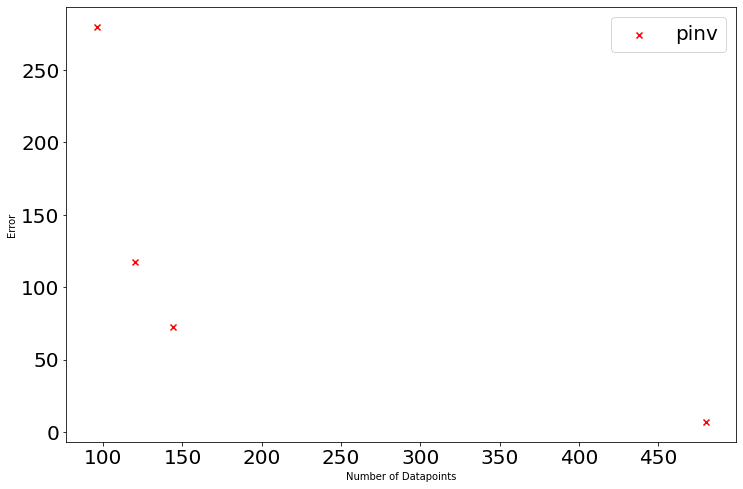

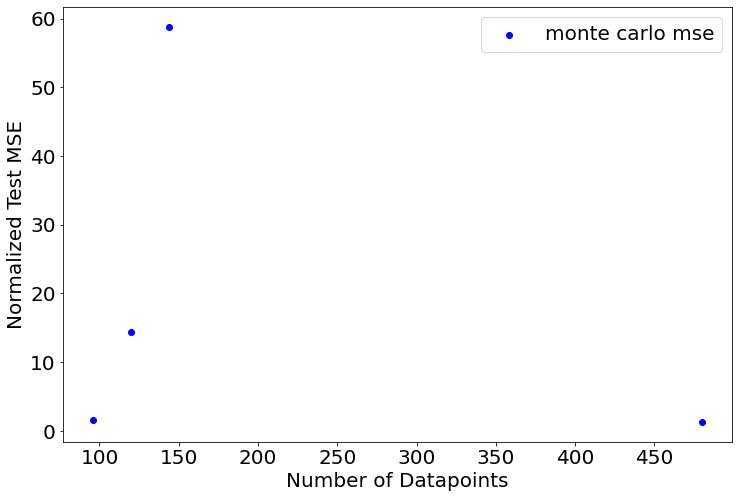

In [3]:
##Question-1.a)

##Definining theta = [100,-99,98,-97...-1] ; theta_not = 0
theta = []
d = 100

for i in range(100, -1, -1):
    mod = i%2
    if mod == 0:
        theta.append(i)
    else:
        theta.append(-i)
theta = theta[:-1]
theta.insert(0, 0)
print('Theta = ', theta)
        
##Generating n + n_test number of datapoints
n_mat = [80, 100, 120, 400]
n_test = []

for i in range(len(n_mat)):   
    n_count = int(round(0.2 * n_mat[i]))
    n_test.append(n_count)

n_mat = np.add(n_mat, n_test)

##Part (i) - Estimation Error
##Part (ii) - MSE

for i in range(len(n_mat)):
    var = np.eye(100)
    mu_x = np.zeros(100)
    var_e = 0.01 * (np.square(np.linalg.norm(theta)))
    X_raw, X, y = generate_data(n_mat[i], 100, mu_x, var, var_e, theta)
    

plot_figure(n_mat, 100, mu_x, var, var_e, theta)


Theta =  [0, 100, -99, 98, -97, 96, -95, 94, -93, 92, -91, 90, -89, 88, -87, 86, -85, 84, -83, 82, -81, 80, -79, 78, -77, 76, -75, 74, -73, 72, -71, 70, -69, 68, -67, 66, -65, 64, -63, 62, -61, 60, -59, 58, -57, 56, -55, 54, -53, 52, -51, 50, -49, 48, -47, 46, -45, 44, -43, 42, -41, 40, -39, 38, -37, 36, -35, 34, -33, 32, -31, 30, -29, 28, -27, 26, -25, 24, -23, 22, -21, 20, -19, 18, -17, 16, -15, 14, -13, 12, -11, 10, -9, 8, -7, 6, -5, 4, -3, 2, -1]
***For n = 96***
(96, 100)
---------------------------------------------------------------------------
(96, 101)
---------------------------------------------------------------------------
(96, 1)
---------------------------------------------------------------------------
Error for Pseudo-Inverse is :  29485.099726687207
Time required for Pseudo-Inverse is :  0.013666152954101562
***For n = 120***
(120, 100)
---------------------------------------------------------------------------
(120, 101)
----------------------------------------------

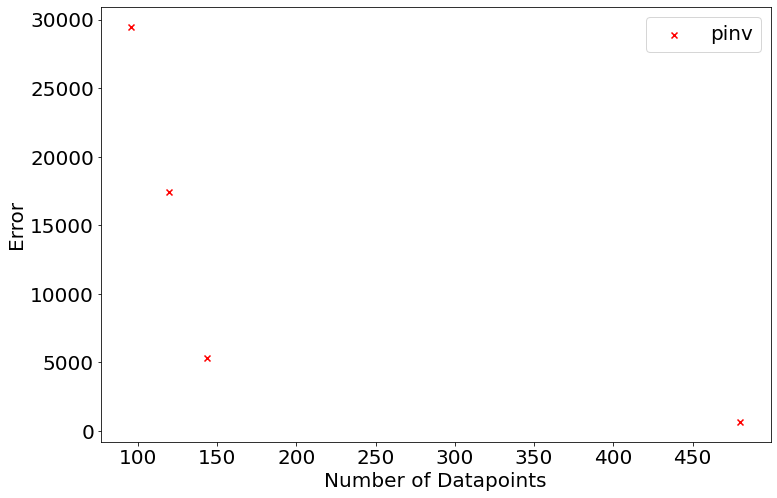

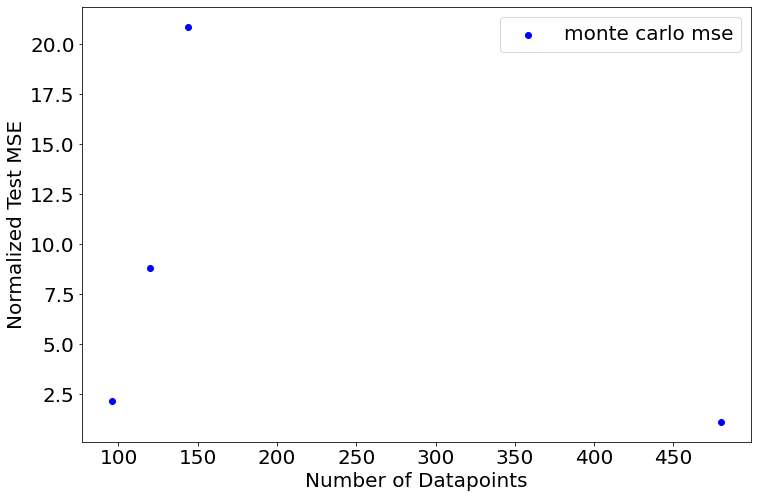

In [4]:
##Question-1.b)

##Definining theta = [100,-99,98,-97...-1] ; theta_not = 0
theta = []

for i in range(100, -1, -1):
    mod = i%2
    if mod == 0:
        theta.append(i)
    else:
        theta.append(-i)
theta = theta[:-1]
theta.insert(0, 0)
print('Theta = ', theta)
        
##Generating n + n_test number of datapoints
n_mat = [80, 100, 120, 400]
n_test = []

for i in range(len(n_mat)):   
    n_count = int(round(0.2 * n_mat[i]))
    n_test.append(n_count)

n_mat = np.add(n_mat, n_test)

##Part (i) - Estimation Error
##Part (ii) - MSE

for i in range(len(n_mat)):
    var = np.eye(100)
    mu_x = np.zeros(100)
    var_e = 0.1 * (np.square(np.linalg.norm(theta)))
    X_raw, X, y = generate_data(n_mat[i], 100, mu_x, var, var_e, theta)
    

plot_figure(n_mat, 100, mu_x, var, var_e, theta)

***For n = 100***
(100, 5)
---------------------------------------------------------------------------
(100, 6)
---------------------------------------------------------------------------
(100, 1)
---------------------------------------------------------------------------
Error for Pseudo-Inverse is :  1.5163732239424693e-16
Time required for Pseudo-Inverse is :  0.0
***For n = 1000***
(1000, 5)
---------------------------------------------------------------------------
(1000, 6)
---------------------------------------------------------------------------
(1000, 1)
---------------------------------------------------------------------------
Error for Pseudo-Inverse is :  3.76365949439018e-18
Time required for Pseudo-Inverse is :  0.0010914802551269531
Monte Carlo MSE : 
[1.5101739089489207e-15, 1.4838041939094724e-15]


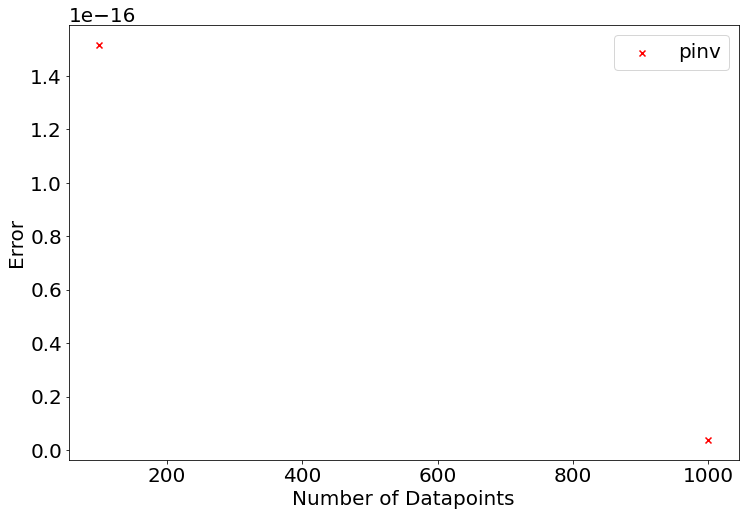

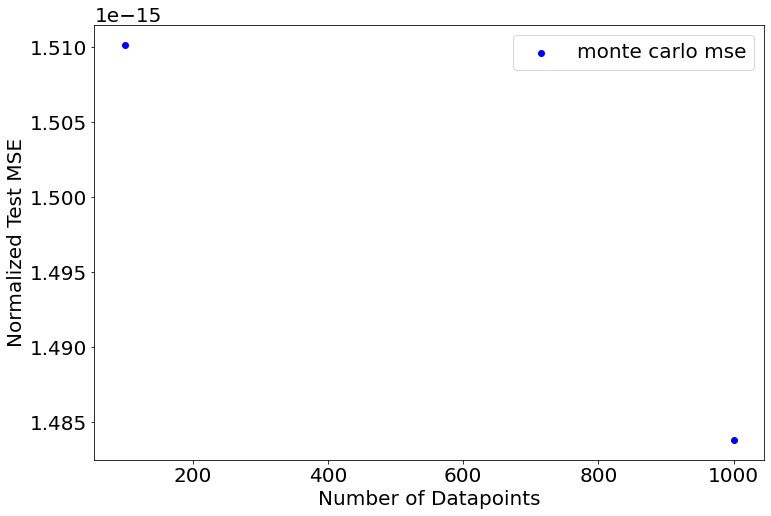

In [5]:
##Question-1.c)

n_mat = [100, 1000]
for i in range(len(n_mat)):
    var = np.eye(5)
    var_e = 1e-6
    X_raw, X, y = generate_data(n_mat[i], 5, [0, 0, 0, 0, 0], var, var_e, [0, 1, 4, 2, 10, 23])
    
plot_figure([100, 1000], 5, [0, 0, 0, 0, 0], var, 1e-6, [0, 1, 4, 2, 10, 23])

Theta =  [0, 100, -99, 98, -97, 96, -95, 94, -93, 92, -91, 90, -89, 88, -87, 86, -85, 84, -83, 82, -81, 80, -79, 78, -77, 76, -75, 74, -73, 72, -71, 70, -69, 68, -67, 66, -65, 64, -63, 62, -61, 60, -59, 58, -57, 56, -55, 54, -53, 52, -51, 50, -49, 48, -47, 46, -45, 44, -43, 42, -41, 40, -39, 38, -37, 36, -35, 34, -33, 32, -31, 30, -29, 28, -27, 26, -25, 24, -23, 22, -21, 20, -19, 18, -17, 16, -15, 14, -13, 12, -11, 10, -9, 8, -7, 6, -5, 4, -3, 2, -1]
Normalized Test MSE for var_e option 1:
[0.6637603638675015, 0.669995553892446, 0.7882840133196706, 0.8936093216654947, 0.9926484071624553, 0.7604014722553349, 1.1133946782191304, 1.251002292132183, 0.9146621393250663, 1.367080374069785, 0.8455365004304018, 0.894985467892086, 0.9457790469994566, 1.2005357227104434, 1.105298904642776, 1.2779778326679485, 0.8486271135373754, 1.5909015102255983, 1.2113217013165614, 1.2878773055547659, 1.3936274518044818, 1.2338291645439283, 1.4186536353051296, 1.5332781625978142, 1.1321340284975097, 1.4137774

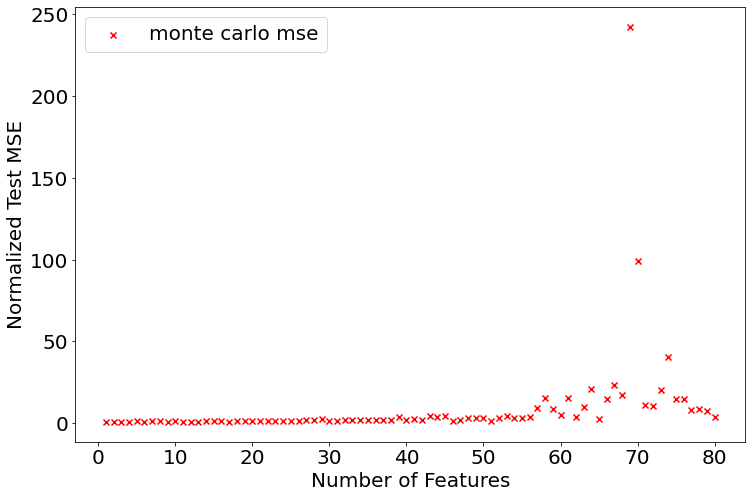

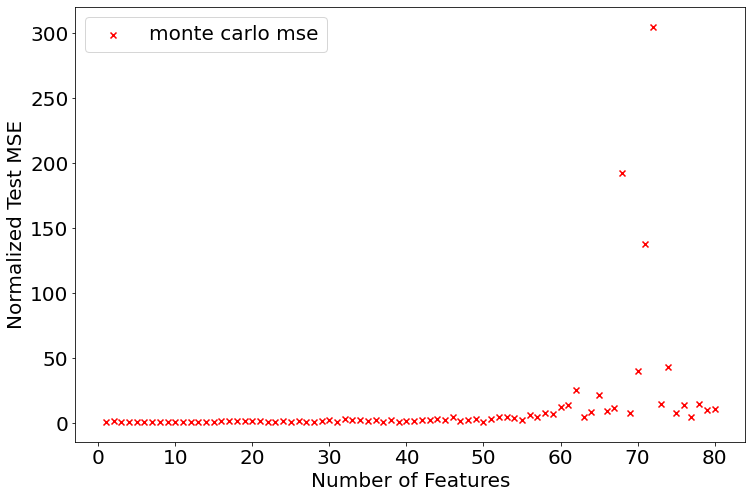

In [6]:
##Question-2
##Definining theta = [100,-99,98,-97...-1] ; theta_not = 0
theta = []
d_small = 1
error_mse_list1 = []
error_mse_list2 = []
d_small_list1 = []
d_small_list2 = []

for i in range(100, -1, -1):
    mod = i%2
    if mod == 0:
        theta.append(i)
    else:
        theta.append(-i)
theta = theta[:-1]
theta.insert(0, 0)
print('Theta = ', theta)

n = 80 + int(round(0.2 * 80))
#print(n)

while d_small <= 80:
    d_small_list1.append(d_small)
    var = np.eye(d_small)
    mu_x = np.zeros(d_small)
    theta_temp = theta[: len(theta) - (100 - d_small)]
    #print(theta_temp)
    var_e = 0.01 * (np.square(np.linalg.norm(theta_temp)))
    X_raw, X, y = generate_data(n, d_small, mu_x, var, var_e, theta_temp)
    error_mse1 = monte_carlo_estimate(X, y, theta_temp)
    error_mse_list1.append(error_mse1)
    d_small += 1

print('Normalized Test MSE for var_e option 1:')
plot_figure_d_small(error_mse_list1, d_small_list1)

d_small = 1
while d_small <= 80:
    d_small_list2.append(d_small)
    var = np.eye(d_small)
    mu_x = np.zeros(d_small)
    theta_temp = theta[: len(theta) - (100 - d_small)]
    #print(theta_temp)
    var_e = 0.1 * (np.square(np.linalg.norm(theta_temp)))
    X_raw, X, y = generate_data(n, d_small, mu_x, var, var_e, theta_temp)
    error_mse2 = monte_carlo_estimate(X, y, theta_temp)
    error_mse_list2.append(error_mse2)
    d_small += 1

print('Normalized Test MSE for var_e option 2:')    
plot_figure_d_small(error_mse_list2, d_small_list2)
